<a href="https://colab.research.google.com/github/dn3ndra/DeepLearning/blob/main/UAS/10_IntroductionNeuralNetworkswithKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 10: Introduction to Artificial Neural Networks with Keras

## 1. Neural Network (NN) vs. Traditional ML
- NN mampu menyelesaikan masalah kompleks yang sulit bagi model linier atau pohon keputusan.
- Memerlukan banyak data dan waktu pelatihan lebih lama.

## 2. Multi-Layer Perceptron (MLP)
- Terdiri dari lapisan neuron (nodes)
- Setiap neuron melakukan: output = activation(weighted_sum(inputs))

### Arsitektur:
- **Input layer**: menerima data mentah
- **Hidden layers**: satu atau lebih lapisan tersembunyi (biasanya `ReLU`)
- **Output layer**: satu neuron per kelas (klasifikasi), biasanya `softmax`

## 3. Aktivasi
- **ReLU (Rectified Linear Unit)**: max(0, x)
- **Softmax**: mengubah output menjadi distribusi probabilitas antar kelas

## 4. Kompilasi
- **Loss function**: `sparse_categorical_crossentropy` untuk label integer
- **Optimizer**: `sgd`, `adam`, dll
- **Metrics**: biasanya `accuracy` untuk klasifikasi

## 5. Training & Validation
- Gunakan `validation_data` untuk memantau overfitting
- Epoch = 1 siklus penuh seluruh data training

## 6. Evaluasi
- Evaluasi performa di data yang belum pernah dilihat (test set)

## 7. Summary Keras API
- **Sequential API**: model linear bertingkat
- **Functional API** (bab berikutnya): lebih fleksibel, cocok untuk model kompleks

Import dan Load Dataset

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load dataset Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Normalisasi dan Split Data

In [ ]:
# Bagi data menjadi train, validasi, dan test; skala ke [0, 1]
X_train, X_valid = X_train_full[:-5000]/255.0, X_train_full[-5000:]/255.0
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]
X_test = X_test / 255.0


Definisikan Model

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),           # 1D flatten dari 2D
    keras.layers.Dense(300, activation="relu"),           # hidden layer 1
    keras.layers.Dense(100, activation="relu"),           # hidden layer 2
    keras.layers.Dense(10, activation="softmax")          # output layer: 10 kelas
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compile Model

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",         # stochastic gradient descent
              metrics=["accuracy"])


Training Model

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6906 - loss: 0.9756 - val_accuracy: 0.8230 - val_loss: 0.5063
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8268 - loss: 0.5022 - val_accuracy: 0.8160 - val_loss: 0.5058
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8464 - loss: 0.4421 - val_accuracy: 0.8516 - val_loss: 0.4173
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8526 - loss: 0.4250 - val_accuracy: 0.8636 - val_loss: 0.3924
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8628 - loss: 0.3964 - val_accuracy: 0.8614 - val_loss: 0.3892
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8679 - loss: 0.3793 - val_accuracy: 0.8620 - val_loss: 0.4101
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8741 - loss: 0.3646 - val_accuracy: 0.8686 - val_loss: 0.3664
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8778 - loss: 0.3474 

Evaluasi Model

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8658 - loss: 0.3771
Test accuracy: 0.8622000217437744


Visualisasi Akurasi Training & Validasi

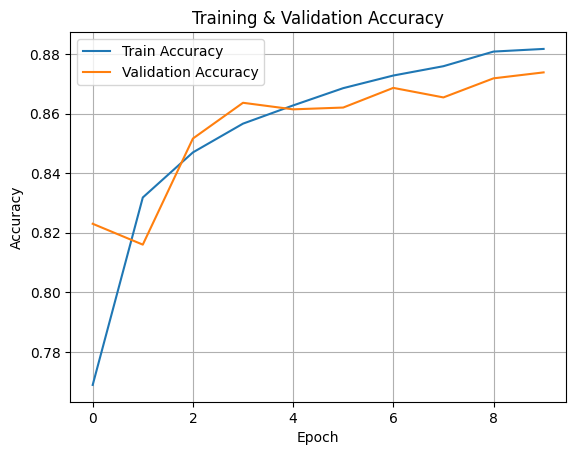

In [ ]:
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")
plt.legend()
plt.grid()
plt.show()
